<a href="https://colab.research.google.com/github/ericakitano/Project-2/blob/main/Project_2_Part_2_(Core)_Erica_Kitano_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [33]:
#Import Libraries
import pandas as pd

# **2. Load Data**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#Load Data
filename1 = '/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Project/Project2/healthcare-dataset-stroke-data.csv'
df1 = pd.read_csv (filename1)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***


# **3. Inspect & Clean the Data**

In [36]:
df1.shape

(5110, 12)

There are 5110 rows and 12 columns in this dataset.

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **3.1 Check for Duplicates**

In [39]:
df1.duplicated().sum()

0

There are no duplicates in this dataset.

## **3.2 Check for Missing Values**

In [40]:
df1.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are **201 missing values** in the column: **`bmi`**.

In [41]:
#Check the % of missing values for each column.
df1.isna().sum() / df1.shape[0]

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

The rows that are missing values in the `bmi` column is 3.9% which is less than 5% of the overall data, therefore, we can drop these rows.

In [42]:
#Drop rows with missing values
df1.dropna(inplace=True)

In [43]:
#Check to make sure there are no more missing values
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no more missing values in this dataset.

## **3.3 Check for Unnecessary Columns**

In [45]:
#Display the number of rows and columns
df1.shape

(4909, 12)

The dataset currently consists of 4909 rows and 12 columns.

In [46]:
#Check if there are any columns where all data have the same or different values, 
#because such columns are usually not useful in modeling.
df1.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

I will drop the `id` column from the dataset as every value in this column is unique and it does not provide any useful information for predicting the target.

In [47]:
df1 = df1.drop(columns = 'id')

In [49]:
#Confirm that the column: 'id' has been dropped.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


## **3.4 Check for Inconsistent Values**

Check for inconsistent values of **categorical columns**: `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`

**Column: `gender`**

In [52]:
#Column: gender
df1['gender'].value_counts() 

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

There are no inconsistent values in this column.

**Column: `ever_married`**

In [54]:
#Column: ever_married
df1['ever_married'].value_counts() 

Yes    3204
No     1705
Name: ever_married, dtype: int64

There are no inconsistent values in this column.

**Column: `work_type`**

In [55]:
#Column: work_type
df1['work_type'].value_counts() 

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

There are no inconsistent values in this column.

**Column: `Residence_type`**

In [56]:
#Column: Residence_type
df1['Residence_type'].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

There are no inconsistent values in this column.

**Column: `smoking_status`**

In [57]:
#Column: smoking_status
df1['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

There are no inconsistent values in this column.

**Column: `stroke`**

In [60]:
#Column: stroke
df1['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

There are no inconsistent values in this column.

This is our target column.

The classes are unbalanced.

## **3.5 Check for Odd Values**

Check for any odd values in the **numerical** columns: `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`

In [59]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- There are no odd values in this dataset.
- From this data, we can see that the columns: `hypertension`, `heart_disease`, and `stroke` (target) only have two values 0 and 1, which means that these columns are categorical as opposed to continuous numerical.

Note: The dtype of the column: `Age` is `float` and minimum age is 0.08 and not a whole number.

In [ ]:
#pd.set_option('display.max_rows', None)
df1['age'].value_counts()

It appears that all ages under 2 are expressed in decimals rather than whole numbers in this dataset.

# **4. Exploratory Data Analysis**

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


- Numerical Features:
   - age
   - avg_glucose_level
   - bmi
- Categorical Features (includes 0 and 1):
  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status
- Target (Classification):
  - stroke


## **4.1 Numerical Features**

**Boxplot and Histogram**

**`age`**

Text(0.5, 0, 'age')

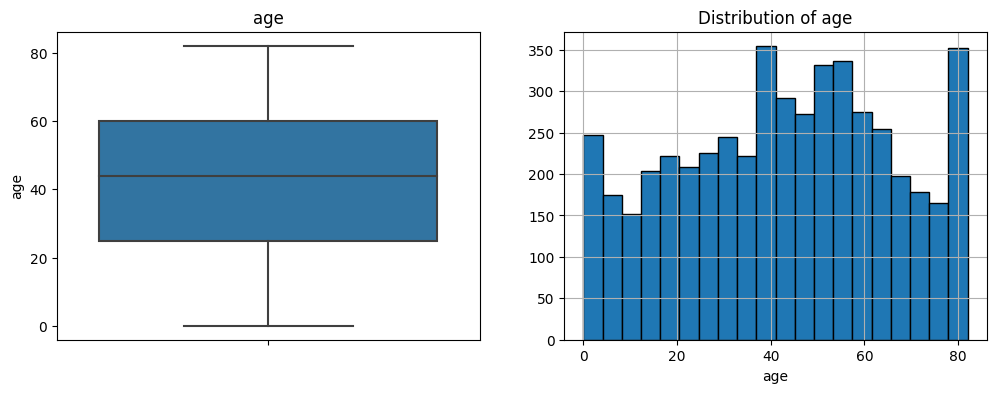

In [69]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='age', data=df1, ax=axes[0])
axes[0].set_title("age");
#Create a histogram
df1['age'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of age')
axes[1].set_xlabel('age')

**Interpretation**: The data is fairly evenly distributed, and there are no outliers.

**`avg_glucose_level`**

Text(0.5, 0, 'avg_glucose_level')

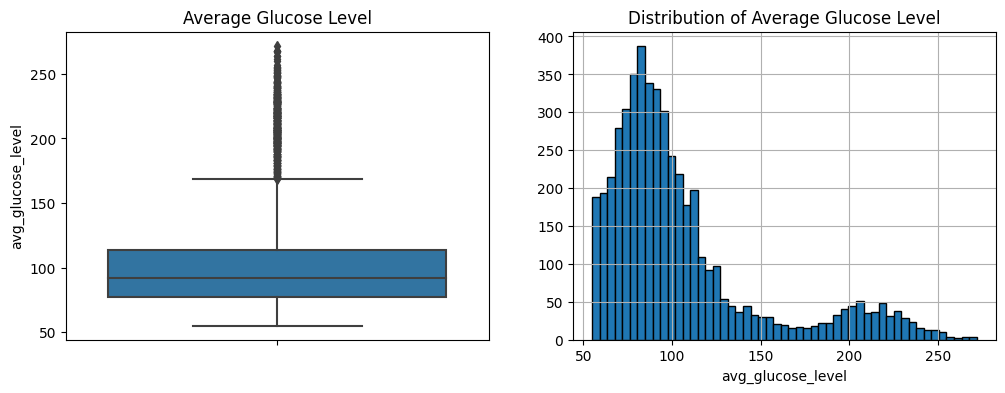

In [70]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='avg_glucose_level', data=df1, ax=axes[0])
axes[0].set_title("Average Glucose Level");
#Create a histogram
df1['avg_glucose_level'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of Average Glucose Level')
axes[1].set_xlabel('avg_glucose_level')

**Interpretation**: The data is skewed to the high side. There are many outliers on the high side.

**`bmi`**

Text(0.5, 0, 'bmi')

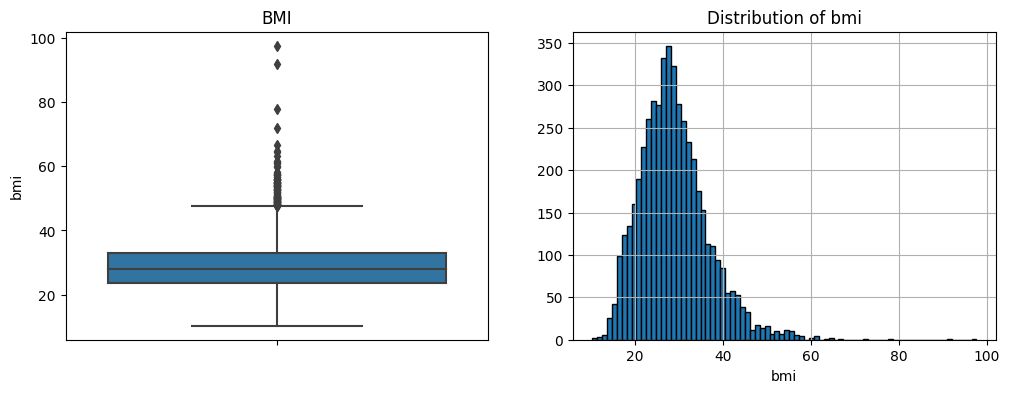

In [71]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='bmi', data=df1, ax=axes[0])
axes[0].set_title("BMI");
#Create a histogram
df1['bmi'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of bmi')
axes[1].set_xlabel('bmi')

**Interpretation**: The data is skewed to the high side and there are several outliers for values greater than ~50.

## **4.2 Categorical Features**

  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status


**`gender`**

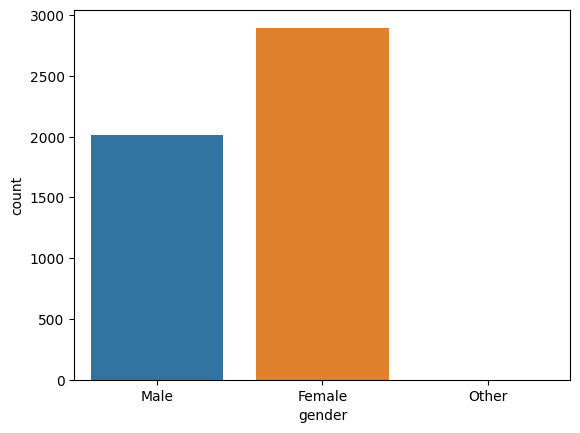

In [74]:
# Countplot with seaborn
sns.countplot(data=df1,x='gender');

**Interpretation**: There are more Female data compared to male data.

**`hypertension`**

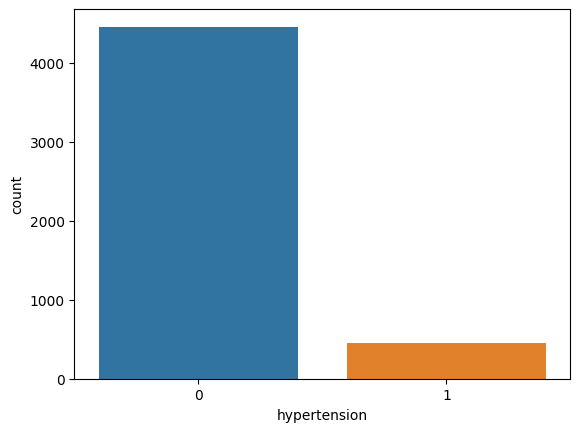

In [75]:
# Countplot with seaborn
sns.countplot(data=df1,x='hypertension');

**Interpretation**: Only a small percentage of the data (~10%) shows hypertension = 1

**`heart_disease`**

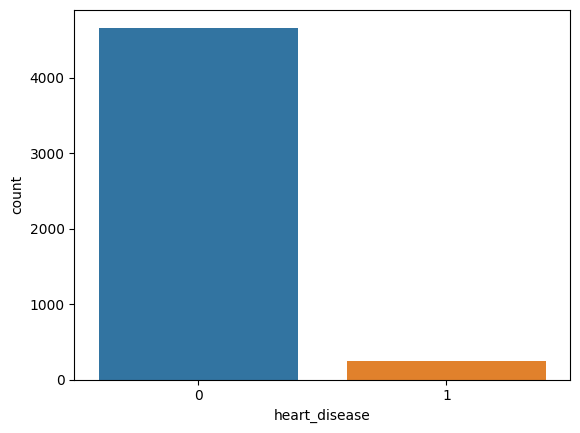

In [76]:
# Countplot with seaborn
sns.countplot(data=df1,x='heart_disease');

**Interpretation**: Only a small percentage of the data shows heart_disease = 1.

**`ever_married`**

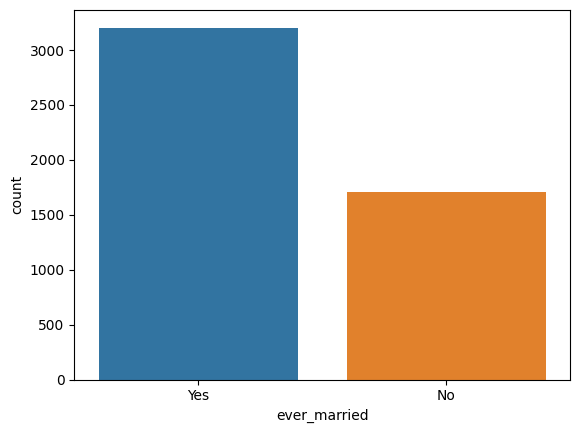

In [77]:
# Countplot with seaborn
sns.countplot(data=df1,x='ever_married');

**Interpretation**: About 2/3 of the data have been married and about 1/3 of the data have never been married.

**`work_type`**

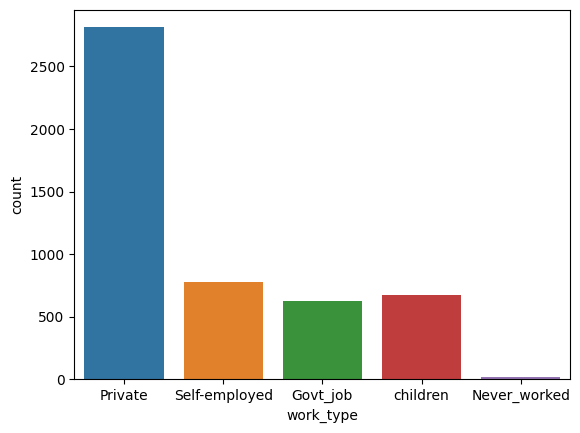

In [78]:
# Countplot with seaborn
sns.countplot(data=df1,x='work_type');

**Interpretation**: Many of the patients work at private companies. A very small percentage of the patients who are not children have never worked.

**`Residence_type`**

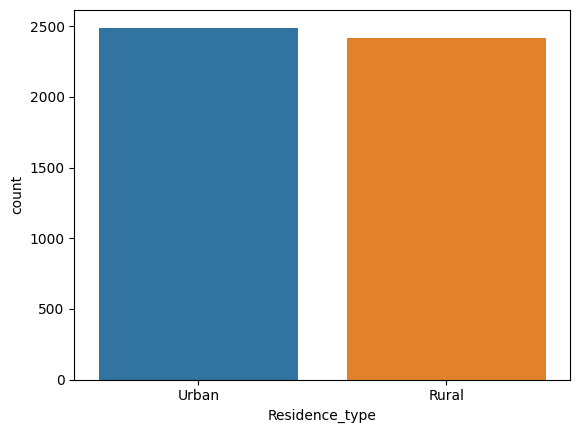

In [83]:
# Countplot with seaborn
sns.countplot(data=df1,x='Residence_type');

**Interpretation**: There are about equal number of patients who live in urban areas and rural areas.

**`smoking_status`**

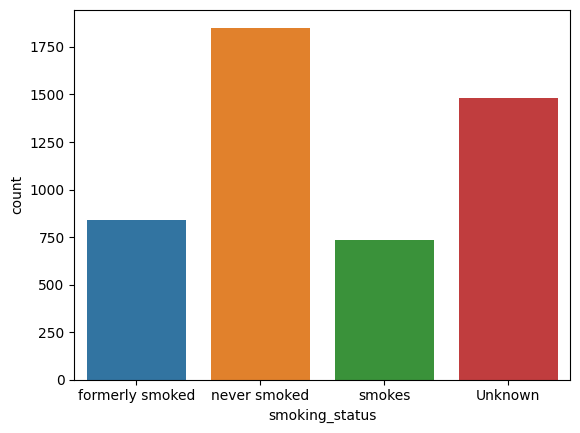

In [84]:
# Countplot with seaborn
sns.countplot(data=df1,x='smoking_status');

**Interpretation**: The group of patients who have never smoked is the largest group in this dataset, but there are also some significant number of patients with unknown smoking status.

## **4.3 Target**

**`stroke`**

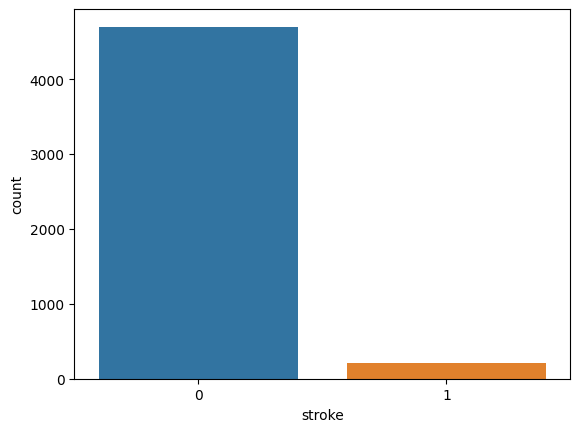

In [73]:
# Countplot with seaborn
sns.countplot(data=df1,x='stroke');

**Interpretation**: Only small percentage of the data shows stroke = 1.